<a href="https://colab.research.google.com/github/abdullahnizami77/Machine-Learningg/blob/main/Image_Classification_Using_Augementation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DATA INPUT PIPELINE**



In [1]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import os


In [2]:
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.io import imread

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [4]:
Categories=['Infected','Healthy']

In [5]:
from google.colab import drive
drive.mount ('/content/drive/')

Mounted at /content/drive/


In [6]:
flat_data_arr=[]
target_arr=[]

In [7]:
datadir='/content/drive/MyDrive/IGTDU DATA'

In [8]:
for i in Categories:
  print(f'loading... category : {i}')
  path=os.path.join(datadir,i)
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    img_resized=resize(img_array,(150,150,3))
    flat_data_arr.append(img_resized.flatten())
    target_arr.append(Categories.index(i))
  print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data)
df['Target']=target
df

loading... category : Infected
loaded category:Infected successfully
loading... category : Healthy
loaded category:Healthy successfully


,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.603224,0.513028,0.544400,0.572949,0.482753,0.514126,0.596461,0.506265,0.537638,0.568463,...,0.375167,0.253599,0.245756,0.380680,0.259111,0.251268,0.411406,0.289838,0.281994,0
1,0.588876,0.541818,0.549661,0.544972,0.497913,0.505756,0.541983,0.494924,0.502767,0.610475,...,0.699110,0.659894,0.663816,0.710556,0.671341,0.675262,0.682099,0.642884,0.646805,0
2,0.709331,0.717175,0.705410,0.716449,0.724292,0.712527,0.687517,0.695360,0.683595,0.713481,...,0.492935,0.445876,0.445876,0.545245,0.498186,0.498186,0.475452,0.428393,0.428393,0
3,0.700257,0.684571,0.680650,0.688819,0.673133,0.669211,0.676748,0.661062,0.657141,0.689567,...,0.580706,0.541490,0.537569,0.554590,0.515374,0.511452,0.625763,0.586548,0.582626,0
4,0.664753,0.641224,0.641224,0.666855,0.643325,0.643325,0.647146,0.623617,0.623617,0.657857,...,0.595804,0.552666,0.568353,0.585072,0.541935,0.557621,0.533741,0.490604,0.506290,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,0.251870,0.219153,0.220604,0.251710,0.217624,0.219074,0.245901,0.214089,0.215539,0.245205,...,0.844240,0.801103,0.824632,0.678741,0.635604,0.659134,0.729318,0.686180,0.709710,1
891,0.704124,0.680595,0.696281,0.741964,0.718434,0.734120,0.682427,0.658898,0.674584,0.662991,...,0.664926,0.617867,0.625710,0.665649,0.618590,0.626433,0.654752,0.607693,0.615537,1
892,0.252574,0.212913,0.215814,0.630180,0.583121,0.590964,0.629367,0.582308,0.590151,0.632445,...,0.736415,0.712885,0.728571,0.725419,0.701889,0.717576,0.699835,0.676305,0.691992,1
893,0.272686,0.240883,0.237983,0.273484,0.241682,0.238781,0.265346,0.233544,0.230643,0.262104,...,0.779845,0.740629,0.744551,0.778011,0.738795,0.742717,0.784314,0.745098,0.749020,1


In [9]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)
print('Splitted Successfully')

Splitted Successfully




---

# **SAVING IN FILE**

In [74]:
import cv2 as cv
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#instantiate the ImageDataGenerator class
datagen = ImageDataGenerator(
        rotation_range=40,
        height_shift_range=0.2,
        width_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')
#loop over the data in batches and this automatically saves the images
i = 0
for batch in datagen.flow_from_directory('/content/drive/MyDrive/IGTDU NON AG -DATA/Infected', batch_size=6,target_size=(256,256),
                          save_to_dir='/content/drive/MyDrive/Augemented storage/Infected Augmented', save_format='jpg'):
    i += 1
    if i > 65:
        break


Found 152 images belonging to 2 classes.


In [22]:
import cv2 as cv
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#instantiate the ImageDataGenerator class
datagen = ImageDataGenerator(
        rotation_range=40,
        height_shift_range=0.2,
        width_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')
#loop over the data in batches and this automatically saves the images
i = 0
for batch in datagen.flow_from_directory('/content/drive/MyDrive/IGTDU NON AG -DATA/Healthy', batch_size=6,target_size=(256,256),
                          save_to_dir='/content/drive/MyDrive/Augemented storage/Healthy Augmented', save_format='jpg'):
    i += 1
    if i > 65:
        break

Found 152 images belonging to 2 classes.


# **SVM AUGEMENTD MODEL**

---



In [10]:
datadir1='/content/drive/MyDrive/Augemented storage'

In [11]:
Categories1= ['Healthy Augmented', 'Infected Augmented']
for i in Categories1:
  print(f'loading... category : {i}')
  path=os.path.join(datadir1,i)
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    img_resized=resize(img_array,(150,150,3))
    flat_data_arr.append(img_resized.flatten())
    target_arr.append(Categories1.index(i))
  print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data)
df['Target']=target
df

loading... category : Healthy Augmented
loaded category:Healthy Augmented successfully
loading... category : Infected Augmented
loaded category:Infected Augmented successfully


,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.603224,0.513028,0.544400,0.572949,0.482753,0.514126,0.596461,0.506265,0.537638,0.568463,...,0.375167,0.253599,0.245756,0.380680,0.259111,0.251268,0.411406,0.289838,0.281994,0
1,0.588876,0.541818,0.549661,0.544972,0.497913,0.505756,0.541983,0.494924,0.502767,0.610475,...,0.699110,0.659894,0.663816,0.710556,0.671341,0.675262,0.682099,0.642884,0.646805,0
2,0.709331,0.717175,0.705410,0.716449,0.724292,0.712527,0.687517,0.695360,0.683595,0.713481,...,0.492935,0.445876,0.445876,0.545245,0.498186,0.498186,0.475452,0.428393,0.428393,0
3,0.700257,0.684571,0.680650,0.688819,0.673133,0.669211,0.676748,0.661062,0.657141,0.689567,...,0.580706,0.541490,0.537569,0.554590,0.515374,0.511452,0.625763,0.586548,0.582626,0
4,0.664753,0.641224,0.641224,0.666855,0.643325,0.643325,0.647146,0.623617,0.623617,0.657857,...,0.595804,0.552666,0.568353,0.585072,0.541935,0.557621,0.533741,0.490604,0.506290,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1666,0.707924,0.696159,0.668708,0.741835,0.730071,0.702620,0.753338,0.741573,0.714122,0.736401,...,0.516634,0.469575,0.469575,0.415412,0.368354,0.368354,0.426409,0.379350,0.379350,1
1667,0.900885,0.834219,0.873434,0.874835,0.808169,0.847384,0.891478,0.824811,0.864027,0.951443,...,0.820253,0.741806,0.788913,0.777371,0.695314,0.753250,0.764386,0.682033,0.740856,1
1668,0.575536,0.501026,0.516712,0.595180,0.520670,0.536356,0.624067,0.549558,0.565244,0.644037,...,0.392195,0.525805,0.336721,0.460668,0.541112,0.348914,0.573469,0.618633,0.423956,1
1669,0.915731,0.900044,0.888280,0.888961,0.873274,0.861510,0.869232,0.853546,0.841781,0.862840,...,0.743975,0.700838,0.685152,0.752498,0.709361,0.693674,0.746984,0.703846,0.688160,1


In [12]:
x_train=df.iloc[:,:-1]
y_train=df.iloc[:,-1]


In [23]:
x_train

,0,1,2,3,4,5,6,7,8,9,...,67490,67491,67492,67493,67494,67495,67496,67497,67498,67499
0,0.603224,0.513028,0.544400,0.572949,0.482753,0.514126,0.596461,0.506265,0.537638,0.568463,...,0.262257,0.375167,0.253599,0.245756,0.380680,0.259111,0.251268,0.411406,0.289838,0.281994
1,0.588876,0.541818,0.549661,0.544972,0.497913,0.505756,0.541983,0.494924,0.502767,0.610475,...,0.644426,0.699110,0.659894,0.663816,0.710556,0.671341,0.675262,0.682099,0.642884,0.646805
2,0.709331,0.717175,0.705410,0.716449,0.724292,0.712527,0.687517,0.695360,0.683595,0.713481,...,0.454042,0.492935,0.445876,0.445876,0.545245,0.498186,0.498186,0.475452,0.428393,0.428393
3,0.700257,0.684571,0.680650,0.688819,0.673133,0.669211,0.676748,0.661062,0.657141,0.689567,...,0.491438,0.580706,0.541490,0.537569,0.554590,0.515374,0.511452,0.625763,0.586548,0.582626
4,0.664753,0.641224,0.641224,0.666855,0.643325,0.643325,0.647146,0.623617,0.623617,0.657857,...,0.568133,0.595804,0.552666,0.568353,0.585072,0.541935,0.557621,0.533741,0.490604,0.506290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1666,0.707924,0.696159,0.668708,0.741835,0.730071,0.702620,0.753338,0.741573,0.714122,0.736401,...,0.427686,0.516634,0.469575,0.469575,0.415412,0.368354,0.368354,0.426409,0.379350,0.379350
1667,0.900885,0.834219,0.873434,0.874835,0.808169,0.847384,0.891478,0.824811,0.864027,0.951443,...,0.737735,0.820253,0.741806,0.788913,0.777371,0.695314,0.753250,0.764386,0.682033,0.740856
1668,0.575536,0.501026,0.516712,0.595180,0.520670,0.536356,0.624067,0.549558,0.565244,0.644037,...,0.339813,0.392195,0.525805,0.336721,0.460668,0.541112,0.348914,0.573469,0.618633,0.423956
1669,0.915731,0.900044,0.888280,0.888961,0.873274,0.861510,0.869232,0.853546,0.841781,0.862840,...,0.663766,0.743975,0.700838,0.685152,0.752498,0.709361,0.693674,0.746984,0.703846,0.688160




---
# **SVM MODEL**


In [14]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(x_train, y_train)


SVC(random_state=0)

In [15]:
y_pred = classifier.predict(x_test) 
y_pred

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0])

In [16]:
print('actual data is')
np.array(y_test)

actual data is


array([1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0])

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)


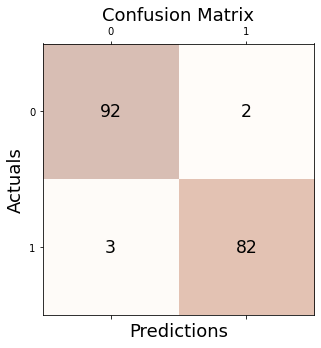

In [18]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [19]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score 


In [20]:
print('Accuracy  :', accuracy_score(y_test, y_pred)*100 ,"%")
print('Precision :' , precision_score(y_test, y_pred)*100 ,"%")
print('Recall    :', recall_score(y_test, y_pred)*100 ,"%")
print('F1 Score  :',f1_score(y_test, y_pred)*100 ,"%")


Accuracy  : 97.20670391061452 %
Precision : 97.61904761904762 %
Recall    : 96.47058823529412 %
F1 Score  : 97.0414201183432 %


In [3]:
import plotly.express as px

# create a dataframe with the metrics and their values
df = pd.DataFrame({'Accuracy': [0.85], 'Precision': [0.84], 'Recall': [0.82], 'F1 Score': [0.83]})

# create a 3D scatter plot
fig = px.scatter_3d(df, x='Accuracy', y='Precision', z='Recall', color='F1 Score', size='F1 Score',
                    opacity=0.7, symbol='F1 Score', title='SVM Model Performance on Testing Dataset')

# set axis labels and ranges
fig.update_layout(scene=dict(xaxis_title='Accuracy', yaxis_title='Precision', zaxis_title='Recall'),
                  scene_xaxis_range=[0, 1], scene_yaxis_range=[0, 1], scene_zaxis_range=[0, 1])

# show the plot
fig.show()
